# Scholarship Allocation Tool
# Pre-processing: Text analysis

<br>The dataset consists of 22 entries by scholarship applicants describing financial circumstances. Each text entry has an associated percent_eligibility value, which is the amount of scholarship the applicant was eligible for.
<br>
<br>**Question**: Can text entries desribing a fmaily's additional financial circumstances predict the amount of scholarship the applicant would be awarded based on hosehold income and other quantities?
<br>**Method**: Text samples were tokenized and a bag-of-words approach was used. Cosine similarity was calculated for all pairs of text entries in the dataset. The relationship, or lack of, between similarity scores and percent eligibility difference was explored.
<br>
<br>**Expected result:** if text can predict eligibility, we will see that as cosine similarity scores approach 1, indicating 100 percent similarity, percent eligibility will also become more similar and the difference between the percent eligibility values in each pair will approach zero.


**Reources:**
<br> text processing
<br> https://stackoverflow.com/questions/65199011/is-there-a-way-to-check-similarity-between-two-full-sentences-in-python

<br>modeling
<br>https://www.kaggle.com/code/jonathanoheix/sentiment-analysis-with-hotel-reviews/notebook

<br>other
<br>https://medium.com/analytics-vidhya/predict-public-review-ratings-a-preview-of-natural-language-processing-series-14953f5a126d
<br>https://medium.com/data-science-lab-spring-2021/amazon-review-rating-prediction-with-nlp-28a4acdd4352
<br>https://github.com/acfilok96/Amazon-Review-Rating-Prediction-with-NLP-/blob/main/File/3.Data_Text_To_Numeric.ipynb

# Guide: <a id='guide'></a>
## 1. [Import libraries](#import)

## 2. [Import and Clean the data](#clean)

## 3. [Text analysis: cossine similarity](#cossim)

## 4. [Visualize results](#viz)

## 5. [Summary](#summary)

__________

# 1. Import libraries<a id='import'></a>

## Import libraries

In [1]:
# Import the libraries
import requests
import io

import pandas as pd
import numpy as np

from IPython.display import display
pd.options.display.max_columns = None

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = [11, 8]

import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer



[To Guide](#guide)
<a id='clean'></a>
# 2. Data import and cleaning

In [2]:
# Text based analysis. Do notes predict award?
# cosine distance between two text inputs
# are certain notes more likely to be awarded?

# tokenize, bag of words
# distance


In [3]:
# CODE SOURCE: https://sites.temple.edu/tudsc/2017/03/30/measuring-similarity-between-texts-in-python/#:~:text=The%20cosine%20similarity%20is%20the,the%20similarity%20between%20two%20documents.

In [4]:
df_pastreal_allotment = pd.read_csv ('/Users/sandidge/Desktop/Python_Projects/BGS/exports_imports/df_pastreal_allotment.csv', index_col=0)

df_pastreal_allotment.head()

,Name,household_income,Notes,year,number_adults,number_children,single,additional_expenses,employment,divorce,medical,education,immigration,housing,total_circumstances,percent_award,circumstance_cost,disposable_unit,extra_cost,single_parent_cost,family_base_income,family_need_income,disposable_income,family_disposable_unit,percent_eligible
0,Jessica Knox,30000.0,none,2019,2,3,0,none,0,0,0,0,0,0,0,40.0,1000.0,5000.0,0.0,0.0,98591.666667,98591.666667,-68591.666667,20000.0,90
1,Masai's Abrams,50000.0,none,2019,1,1,1,none,0,0,0,0,0,0,0,60.0,1000.0,5000.0,5359.0,5359.0,55569.666667,60928.666667,-10928.666667,7500.0,90
2,Sauntiara Williams,26800.0,Reina did not attend RL Orientation with her b...,2019,1,1,1,Reina did not attend RL Orientation with her b...,0,0,0,0,0,0,0,40.0,1000.0,5000.0,5359.0,5359.0,55569.666667,60928.666667,-34128.666667,7500.0,90
3,Soleil Warner,50000.0,none,2019,1,1,1,none,0,0,0,0,0,0,0,100.0,1000.0,5000.0,5359.0,5359.0,55569.666667,60928.666667,-10928.666667,7500.0,90
4,Alina Flemmings,102912.0,Mom is sole provider for elderly mother and he...,2020,3,1,0,Mom is sole provider for elderly mother and he...,0,0,0,0,0,0,0,90.0,1000.0,5000.0,0.0,0.0,64032.666667,64032.666667,38879.333333,12500.0,0


In [5]:
#get filtered dataframe with only two needed columns
df_past = df_pastreal_allotment[['Notes', 'percent_eligible']]

df_past['Notes'] = df_past.Notes.replace('none', '')
df_past['Notes'] = df_past.Notes.replace('', value=np.nan)

#df_past.head(3)

/var/folders/bv/4mctz8d94zx0nlh0hjsm4x8h0000gn/T/ipykernel_28847/3889394755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_past['Notes'] = df_past.Notes.replace('none', '')
/var/folders/bv/4mctz8d94zx0nlh0hjsm4x8h0000gn/T/ipykernel_28847/3889394755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_past['Notes'] = df_past.Notes.replace('', value=np.nan)


In [6]:
#look at missing data
print(df_past.isna().sum())

# drop rows with no notes text
df_past= df_past.dropna().reset_index(drop=True)

Notes               18
percent_eligible     0
dtype: int64


In [7]:
# check data types and missing values
print(df_past.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Notes             22 non-null     object
 1   percent_eligible  22 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes
None


In [8]:
#check the cleaned data
#df_past

[To Guide](#guide)
<a id='cossim'></a>
# 3. Text analysis with cosine similarity<a id='textanalysis'></a>

## Normalize by lemmatization: (preffered)

In [9]:
df_past

,Notes,percent_eligible
0,Reina did not attend RL Orientation with her b...,90
1,Mom is sole provider for elderly mother and he...,0
2,S/O is small business owner who has been unemp...,90
3,One income family. Mom is going through doctor...,90
4,Reduced hours since shelter in place,90
5,"Mom is unemployed since last month, collecting...",90
6,One income household,90
7,Lost job of 14 years. Currently in school to s...,90
8,"Single parent, does not receive child support....",0
9,"Single parent, rent is very high, does not rec...",90


In [10]:
# Instantiate stemmer
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

# Instantiate vectorizer
vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]


In [11]:
# Calculate matrix using first 10 notes items
#df_past_1 = df_past[['Notes', 'percent_eligible']][0:10]

# Copy of the dataset for use as text1
df_past_1 = df_past

In [12]:
# And the remaining 12 items
#df_past_2 = df_past[['Notes', 'percent_eligible']][10:22]

#calculate similarity with all items
df_past_2 = df_past

In [13]:
# Assign some empty lists for results
name_1 = []
name_2 = []
score = []
percent1 = []
percent2 = []

# Set counters for notes item labels
naming1 = 0
naming2 = 0

#Loop through dataframe of first ten notes items
for index, row in df_past_1.iterrows():
    naming2 = 0
    text1 = row['Notes']
    perc1 = row['percent_eligible']
    name1 = 'T1_'+str(naming1)
    naming1 = naming1 + 1    
    # Calculate similarity to each item in the whole dataset    
    for index, row in df_past_2.iterrows():
        text2 = row['Notes']
        perc2 = row['percent_eligible']
        name2 = 'T2_'+ str(naming2)
        naming2 = naming2 + 1
        cossim_score = cosine_sim(text1, text2)
        # Append results to lists
        name_1.append(name1)
        name_2.append(name2)
        score.append(cossim_score)
        percent1.append(perc1)
        percent2.append(perc2)
        
        #print (cosine_sim(text1, text2), name1, name2)

      

/Users/sandidge/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop

In [14]:
# Create an empty dataframe with named results columns
col_names = ['text_1', 'text_2', 'score', 'pe1', 'pe2', 'pe_diff']
df_results = pd.DataFrame(columns=col_names)

# Fill dataframe columnsa with lists of stored results values
df_results['text_1'] = name_1
df_results['text_2'] = name_2
df_results['score'] = score
df_results['pe1'] = percent1
df_results['pe2'] = percent2

#Define difference in allocated eligibility between items
df_results['pe_diff'] = (df_results['pe1']-df_results['pe2'])

df_results

,text_1,text_2,score,pe1,pe2,pe_diff
0,T1_0,T2_0,1.000000,90,90,0
1,T1_0,T2_1,0.000000,90,0,90
2,T1_0,T2_2,0.000000,90,90,0
3,T1_0,T2_3,0.000000,90,90,0
4,T1_0,T2_4,0.000000,90,90,0
...,...,...,...,...,...,...
479,T1_21,T2_17,0.040936,90,90,0
480,T1_21,T2_18,0.615219,90,90,0
481,T1_21,T2_19,0.110308,90,90,0
482,T1_21,T2_20,0.052110,90,80,10


<a id='viz'></a>
# 4. Visualize results

## Plot cosine similarity score with difference in allocated eligibility


In [15]:
# Sort the results by cosine similarity score and reset the index
df_results = df_results.sort_values(by=['score','pe_diff'], ascending=False).reset_index(drop=True)
#df_results.head(10)

In [16]:
# Drop rows where score = 0.99999999 (text is compared to itself)
df_results = df_results[df_results['score']<0.999999999]
df_results.head(5)

,text_1,text_2,score,pe1,pe2,pe_diff
22,T1_18,T2_21,0.615219,90,90,0
23,T1_21,T2_18,0.615219,90,90,0
24,T1_9,T2_8,0.497690,90,0,90
25,T1_8,T2_9,0.497690,0,90,-90
26,T1_9,T2_18,0.447632,90,90,0


In [17]:
# Look at the proportion of pairs that are not similar
low_scores = df_results[df_results['score']<0.1]
print("{:.2%}".format((len(low_scores))/len(df_results))+" percent of pairs have a similarity score below 0.1")

82.68% percent of pairs have a similarity score below 0.1


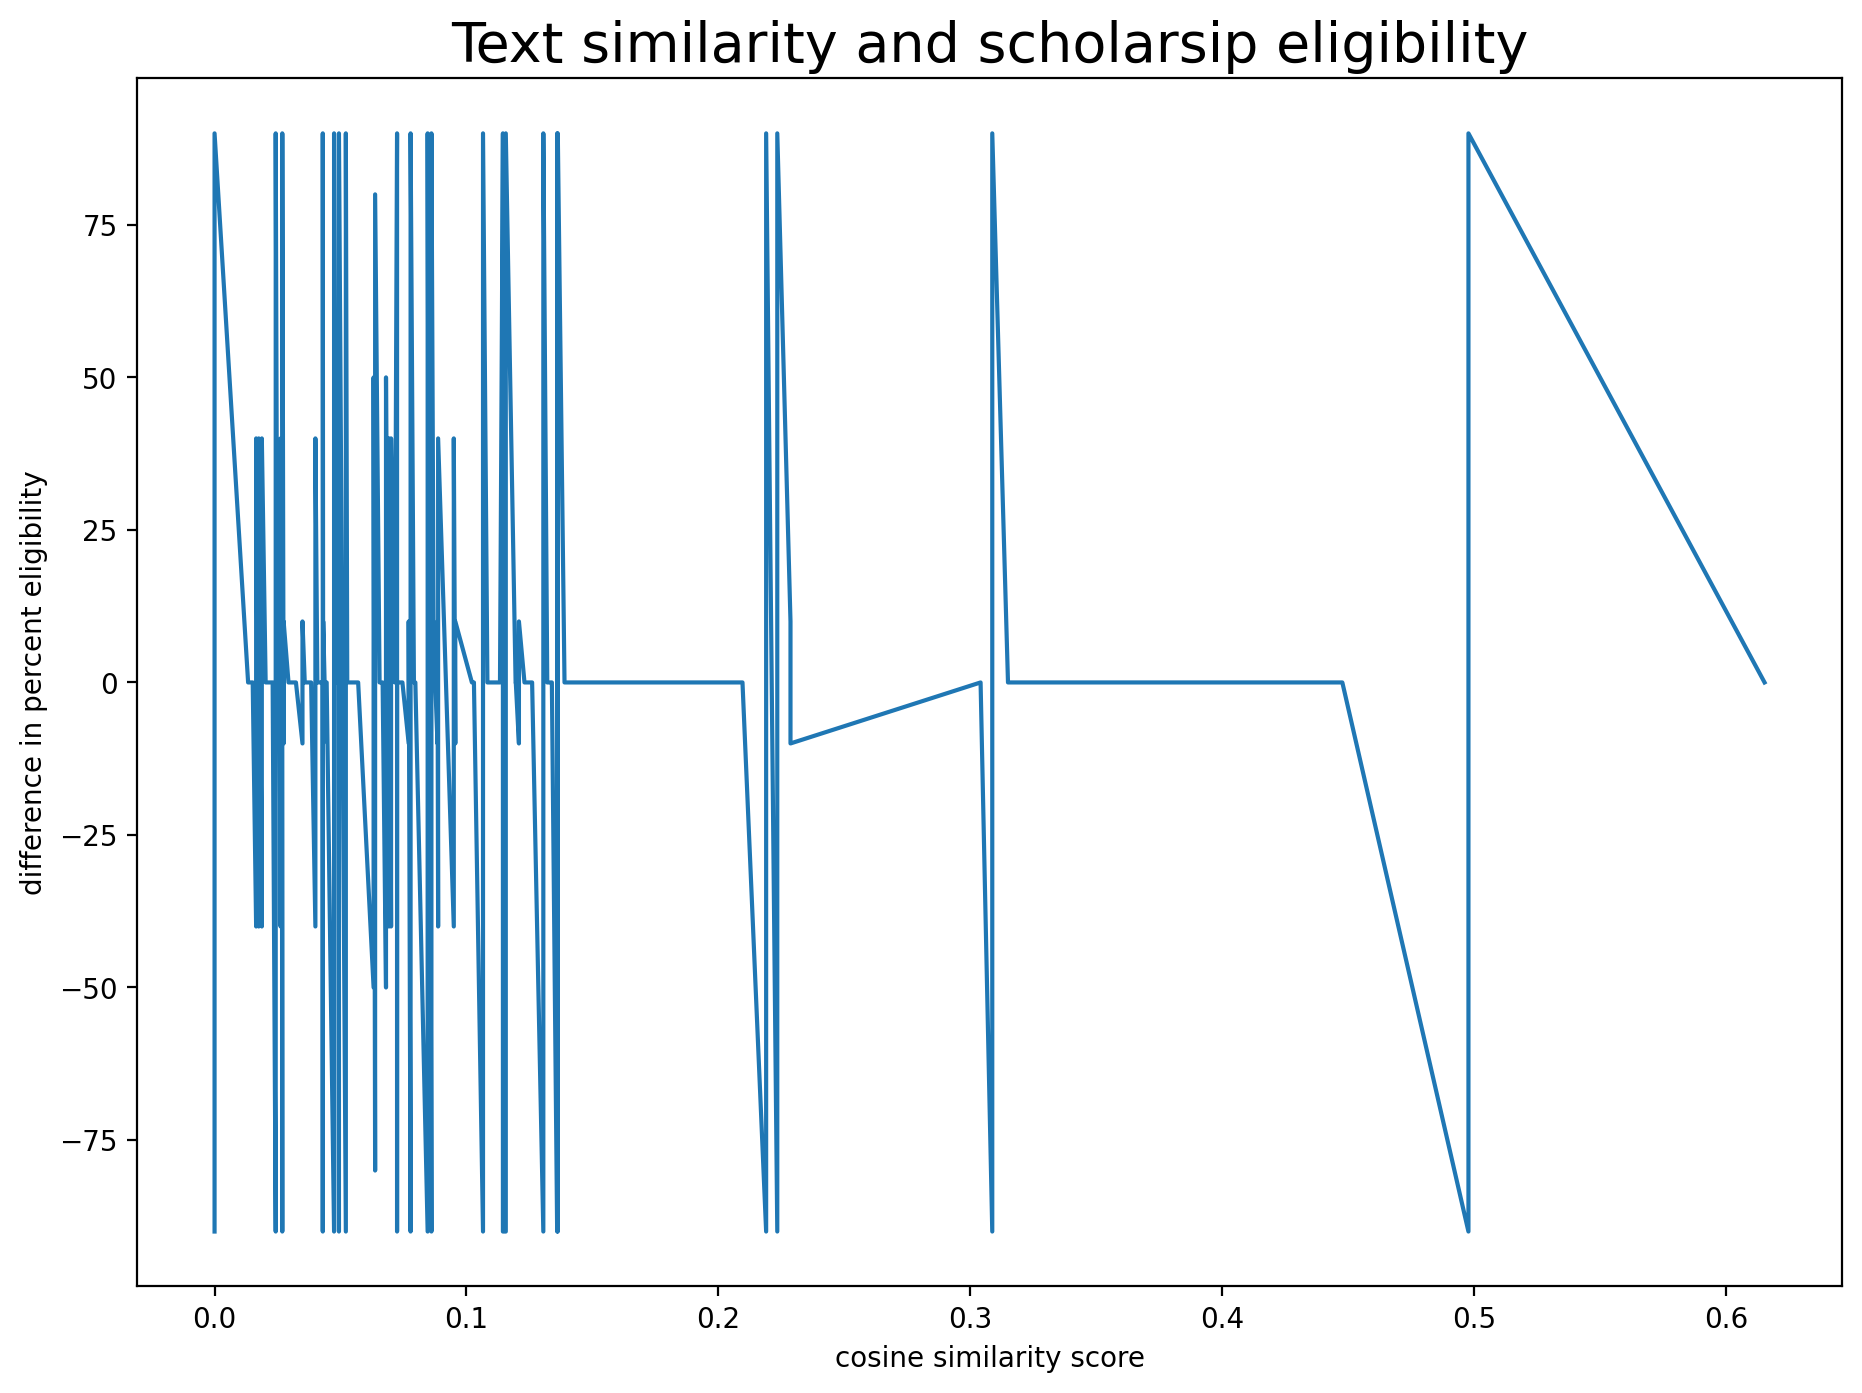

In [18]:
#plot text similarity score and eligibility difference
plt.plot(df_results['score'], df_results['pe_diff'])
plt.title('Text similarity and scholarsip eligibility', fontsize=20)
plt.xlabel('cosine similarity score')
plt.ylabel('difference in percent eligibility')
plt.show()

<br>Most pairs of text have very low similarity scores, with about 83% of scores falling below 10% similarity. We should expect that as cosine similarity goes up the difference between the percent eligibility values should get smaller. The graph does not show a linear relationship or any clear pattern indicating a strong correlation.

## Correlation between features

                score       pe1       pe2       pe_diff
score    1.000000e+00 -0.038425 -0.038425  8.523354e-17
pe1     -3.842457e-02  1.000000 -0.047619  7.237469e-01
pe2     -3.842457e-02 -0.047619  1.000000 -7.237469e-01
pe_diff  8.523354e-17  0.723747 -0.723747  1.000000e+00


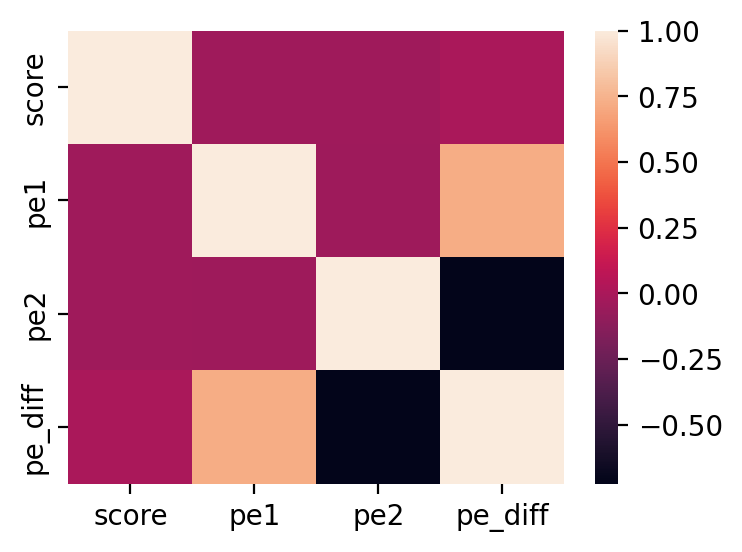

In [19]:
plt.figure(figsize=(4, 3))
corr = df_results.corr(method='pearson')
print(corr)
sns.heatmap(corr)
plt.show()

[To Guide](#guide)
<a id='summary'></a>
# 5. Summary

<br> Cosine similarity was calculated for each pair of text entries in the dataset. The relationship, or lack of, between similarity scores and percent eligibility was explored. Approximately 83 percent of entry pairs had a similarity of less than 10 percent. Pearson correlation coefficients were calculated for feature pairs. Each percenteligibility value was related to the calculated value of the difference between the scores, as would be expected. The correlation coefficient for the difference and the similarity score was close to zero.
<br>It is not surprising that the notes entries are not closely related to percent eligibility. Collected data such as household income and family structure probably have much larger impacts on the availability of disposable income.

________________________________

In [20]:
"""
#NOTES FROM CALL

#Raghunandan to Everyone (Mar 8, 2023, 3:07 PM)
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt') # if necessary...


stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]


print cosine_sim('a little bird', 'a little bird')
print cosine_sim('a little bird', 'a little bird chirps')
print cosine_sim('a little bird', 'a big dog barks')
Raghunandan to Everyone (Mar 8, 2023, 3:16 PM)
text2=row["notes"]
text1 = "lisa went to school"
score=cosine_sim(text1,text2)
schlr_awarded=row["Scholership_awarded"]
df.loc[index,"cosine_sim"] = score
for row, index in df.iterrows():
"""

'\n#NOTES FROM CALL\n\n#Raghunandan to Everyone (Mar 8, 2023, 3:07 PM)\nimport nltk, string\nfrom sklearn.feature_extraction.text import TfidfVectorizer\n\nnltk.download(\'punkt\') # if necessary...\n\n\nstemmer = nltk.stem.porter.PorterStemmer()\nremove_punctuation_map = dict((ord(char), None) for char in string.punctuation)\n\ndef stem_tokens(tokens):\n    return [stemmer.stem(item) for item in tokens]\n\n\'\'\'remove punctuation, lowercase, stem\'\'\'\ndef normalize(text):\n    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))\n\nvectorizer = TfidfVectorizer(tokenizer=normalize, stop_words=\'english\')\n\ndef cosine_sim(text1, text2):\n    tfidf = vectorizer.fit_transform([text1, text2])\n    return ((tfidf * tfidf.T).A)[0,1]\n\n\nprint cosine_sim(\'a little bird\', \'a little bird\')\nprint cosine_sim(\'a little bird\', \'a little bird chirps\')\nprint cosine_sim(\'a little bird\', \'a big dog barks\')\nRaghunandan to Everyone (Mar 8, 2023, 3:16